# 10920EE466000 Introduction of Reinforcement Learning Exam 2

Scoring rule:

Most of the rules are the same as the last exam.

You will get 50% of the score of the problem if your code pass the test data in this file.

The other 50% will be given after passing the hidden test data after the test.

<font color=#FF0000>

**For some problems, there won't be test data provided.
You need to provide the correct answer in these problems.**
</font>

ONLY modify your code in the comment block to ensure your functions can be tested correctly.

## Required functions and library
Please run the following cells first.

In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from matplotlib.table import Table

C:\Users\user\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\user\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
def draw_image(image):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(image):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = 'white'

        tb.add_cell(i, j, width, height, text='%.2f' %image[i][j], 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(range(len(image))):
        tb.add_cell(i, -1, width, height, text=label+1, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(range(len(image))):
        tb.add_cell(-1, j, width, height/2, text=label+1, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)

In [3]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(data.shape[0]):
    for j in range(data.shape[0]):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.1f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.1f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.1f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.1f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')

  plt.show()

In [4]:
def averages(a):
  return [np.average(a[:i+1]) for i in range(len(a))]

## Global variable

You may add new variables here, but do not modify the order in ACTIONS.

In [5]:
ACTIONS = [np.array([0, -1]), np.array([-1, 0]), np.array([0, 1]), np.array([1, 0])] # left, up, right, down
DISCOUNT = 1
ALPHA = 0.1
WIND = np.array([0, 1])
S0_p1 = [1, 5]
ST_p1 = [3, 4]


## Problem1(50%, difficulty: medium): Dynamic programming
Given the following figure, please implement the corresponding environment.

In this environment, the tiles in green represent swamp. The yellow one and the blue one represent the initial state and terminal state, respectively.

In this grid world, four actions can be taken: left, up, right and down.

Moreover, there is intermittent wind on the field. 

<font color=#FF0000>

**After an action is taken, there is a 50% chance that the agent can be blown to the right, i.e., S'<-S'+(0,1) with the probability of 0.5**
</font>

there is intermittent wind on the field: after an action is taken, there is a 50% chance that the agent can be blown to the right, i.e., S'<-S'+(0,1) with the probability of 0.5

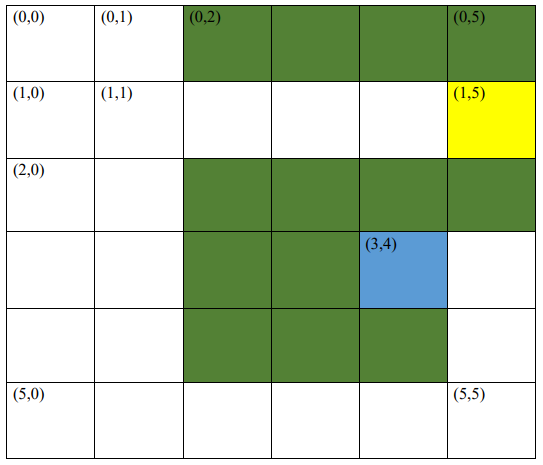

### 1.1(20%):
Given a state and an action, please write a function that returns all the possible next-states and the corresponding rewards.

The input state is a list, and the action should be chosen from the global variable 'ACTIONS'.

And the output is a list with [next_state1, reward1, next_state2, reward2].

Use the following logic in order: 
1. perform the action
2. check if the state is out of bound -> this should be one of the return state
3. get blown
4. check if the state is out of bound -> this should be the other state to return

---




For example, 

input = [5,0], ACTIONS[3]

output = [[5,0], -1, [5,1], -1]



---


input = [5,5], ACTIONS[0]

output = [[5,4], -1, [5,5], -1]


---


input = [3,2], ACTIONS[2]

output = [[3,3], -100, [3,4], -1]


---


input = [0,5], ACTIONS[2]

output = [[0,5], -100, [0,5], -100]


---

input = [0,0], ACTIONS[0]

output = [[0,0], -1, [0,1], -1]


In [6]:
def giveStates(state, action):
  ###### Your code here ######
    result = []
    
    next_state_1 = (state + action).tolist()
    x, y = next_state_1
    if x < 0 or x >= 6 or y < 0 or y >= 6:
        next_state_1 = state
        
    x, y = next_state_1
    if (x == 0 and 2 <= y <= 5) or (x == 2 and 2 <= y <= 5) or (x == 3 and 2 <= y <= 3) or (x == 4 and 2 <= y <= 4):
        reward_1 = -100
    else:
        reward_1 = -1
    result.append(next_state_1)
    result.append(reward_1)
    
    next_state_2 = (next_state_1 + WIND).tolist()
    x, y = next_state_2
    if x < 0 or x >= 6 or y < 0 or y >= 6:
        next_state_2 = next_state_1
        
    x, y = next_state_2
    if (x == 0 and 2 <= y <= 5) or (x == 2 and 2 <= y <= 5) or (x == 3 and 2 <= y <= 3) or (x == 4 and 2 <= y <= 4):
        reward_2 = -100
    else:
        reward_2 = -1
    result.append(next_state_2)
    result.append(reward_2)
      
    return result
  ################################
  

#### Test your function


In [7]:
print(giveStates([5,0], ACTIONS[3]))
print(giveStates([5,5], ACTIONS[0]))
print(giveStates([3,2], ACTIONS[2]))
print(giveStates([0,5], ACTIONS[2]))
print(giveStates([0,0], ACTIONS[0]))

[[5, 0], -1, [5, 1], -1]
[[5, 4], -1, [5, 5], -1]
[[3, 3], -100, [3, 4], -1]
[[0, 5], -100, [0, 5], -100]
[[0, 0], -1, [0, 1], -1]


###1.2(15%): Policy evaluation using dynamic programming
Using the function in 1.1, please evaluate the equiprobabal random policy in this environment, i.e., every action has 25% chance to be chosen.

You should use the Bellman equation with transition probabilities to calculate the result.

Note that the value of the terminal state should always be zero.

In [8]:
def problem2():
    value = np.zeros((6, 6))
    while True:
        # keeping iterating until convergence
        new_value = np.zeros((6, 6))

        ###### Your code here ######
        for i in range(6):
            for j in range(6):
                for action in ACTIONS:
                    next_state_1, reward_1, next_state_2, reward_2 = giveStates([i, j], action)
                    new_value[i, j] += 0.25 * (0.5*(reward_1 + DISCOUNT*value[next_state_1[0], next_state_1[1]]) +
                                               0.5*(reward_2 + DISCOUNT*value[next_state_2[0], next_state_2[1]]))
                    
        new_value[ST_p1[0], ST_p1[1]] = 0
        ################################
        
        if np.sum(np.abs(new_value - value)) < 1e-4:
          return new_value

        value = new_value

    return value

#### Test your function
No test data.

<font color=#FF0000>

**You need to give the correct answer in this problem.**
</font>


(Hint: We provide some final values that may help you check your result.

value[3, 4] = 0, value[0, 0] = -2472.73, value[5, 5] = -1272.97) 

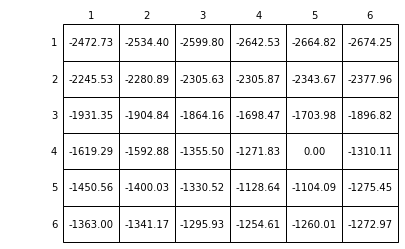

In [9]:
draw_image(problem2())

###1.3(15%): Policy improvement with dynamic programming
Use dynamic programming to find the optimal policy in this environment.

You should calculate the q_value with Bellman equation and use the function from 1.1 in this problem.

In [10]:
def problem3():
    q_value = np.zeros((6,6,4))
    while True:
        # keeping iterating until convergence
        new_q_value = np.zeros((6,6,4))

        ###### Your code here ######
        for i in range(6):
            for j in range(6):
                for k in range(len(ACTIONS)):
                    next_state_1, reward_1, next_state_2, reward_2 = giveStates([i, j], ACTIONS[k])
                    new_q_value[i, j, k] = (0.5*(reward_1 + DISCOUNT * np.max(q_value[next_state_1[0], next_state_1[1]])) +
                                            0.5*(reward_2 + DISCOUNT * np.max(q_value[next_state_2[0], next_state_2[1]])))
        new_q_value[ST_p1[0], ST_p1[1]] = 0
        ################################
            
        
        if np.sum(np.abs(new_q_value - q_value)) < 1e-4:
          return new_q_value

        q_value = new_q_value

    return q_value

#### Test your function
No test data.

<font color=#FF0000>

**You need to give the correct answer in this problem.**
</font>


(Hint: We provide some final values that may help you check your result.

q_value[3, 4] = [0, 0, 0, 0], q_value[0, 0] = [-16.9, -16.9, -68.4, -14.9], 

q_value[5, 5] = [-5.5, -4.0, -5.0, -5.0])

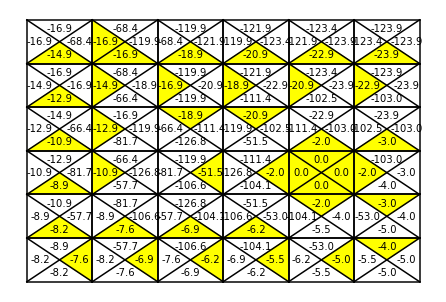

In [11]:
drawTable(problem3())

## Problem2(50%, difficulty: easy):
Consider another environment. Again, the tiles in green represent swamp. The yellow one and the blue one represent the initial state and terminal state respectively.

<font color=#FF0000>

**There is no wind in this environment.**
</font>

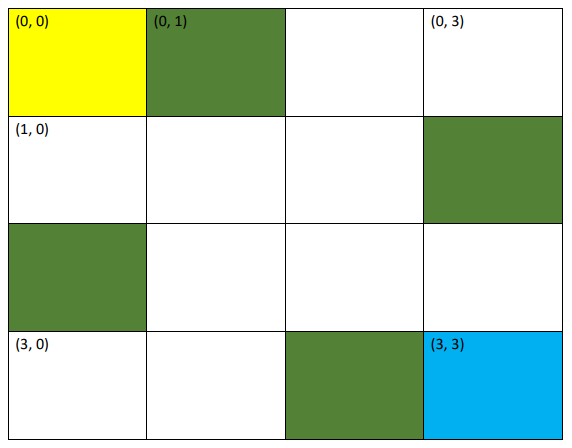

In [12]:
S0_p2 = [0,0]
ST_p2 = [3,3]

### 2.1(25%): Implement the environment
Given a state and an action, please return the next-state and the reward.

The input state is a list, and the action should be chosen from the global variable 'ACTIONS'.

And the output is a list with [next_state, reward].

The reward is -100 if the next-state is in the swamp. Otherwise, the reward should be -1.

If the action yields the agent off the grid, the next-state should be equal to the input state.


---



For example,

input = [0,0], ACTIONS[0]

output = [[0,0], -1]


---


input = [2,3], ACTIONS[3]

output = [[3,3], -1]


---


input = [3,2], ACTIONS[2]

output = [[3,3], -1]


---


input = [3,2], ACTIONS[3]

output = [[3,2], -100]

In [13]:
def step(state, action):
  ###### Your code here ######
    next_state = (state + action).tolist()
    x, y = next_state
    if x < 0 or x >= 4 or y < 0 or y >= 4:
        next_state = state
    
    x, y = next_state
    if (x == 0 and y == 1) or (x == 1 and y == 3) or (x == 2 and y == 0) or (x == 3 and y == 2):
        reward = -100
    else:
        reward = -1

    return [next_state, reward]
  ################################
  

#### Test your function

In [14]:
print(step([0,0], ACTIONS[0]))
print(step([2,3], ACTIONS[3]))
print(step([3,2], ACTIONS[2]))
print(step([3,2], ACTIONS[3]))

[[0, 0], -1]
[[3, 3], -1]
[[3, 3], -1]
[[3, 2], -100]


###2.2(25%): Monte Carlo with epsilon-greedy action selection

Use Monte Carlo method in this environment (simular to HW4) and plot the learning curve over 10000 episodes.

Instead of averaging all the returns using the same weight, simply use ALPHA = 0.1 and discount rate = 1 in this problem.

You should also implement epsilon-greedy action selection with epsilon = 0.3.



In [15]:
def chooseAction(state, qtable, epsilon):
  ###### Your code here ######
    prob = rd.random()
    
    if prob < epsilon:
        action = rd.randint(len(ACTIONS))
    else:
        action = rd.choice(np.flatnonzero(qtable[state[0], state[1]] == np.amax(qtable[state[0], state[1]])))

        
        
    return action   
  ################################

In [16]:
def MC():
    qtable = np.zeros((4,4,4))
    returns = []
  ###### Your code here ######
    qtable[ST_p2[0], ST_p2[1]] = 0
    for i in range(10000):
        pair = []
        R = []
        
        state = S0_p2
        while np.any(state != ST_p2):
            action = chooseAction(state, qtable, 0.3)
            next_state, reward = step(state, ACTIONS[action])
            pair.append([state[0], state[1], action])
            R.append(reward)
            state = next_state
        
        G = 0
        visited = []
        for j in range(len(pair)-1, -1, -1):
            G += R[j]
            if pair[j] not in visited:
                visited.append(pair[j])
                x = pair[j][0]
                y = pair[j][1]
                At = pair[j][2]
                qtable[x, y, At] += 0.1 * (G-qtable[x, y, At])
                
        returns.append(G)
        
              
  ################################
    return returns

#### Test your function

No other test cases.

Run the following cell to plot the average learning curve.

Your result should look like the figure below.

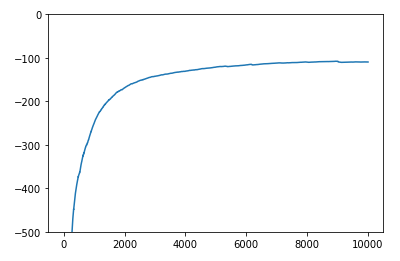

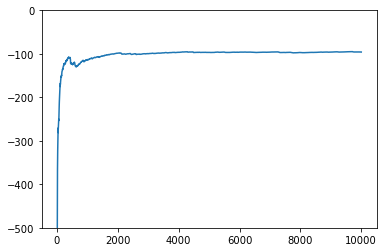

In [17]:
plt.figure()
plt.plot(averages(MC()))
plt.ylim(-500, 0)
plt.show()

# Submission

'files' -> 'download' -> 'download .py'


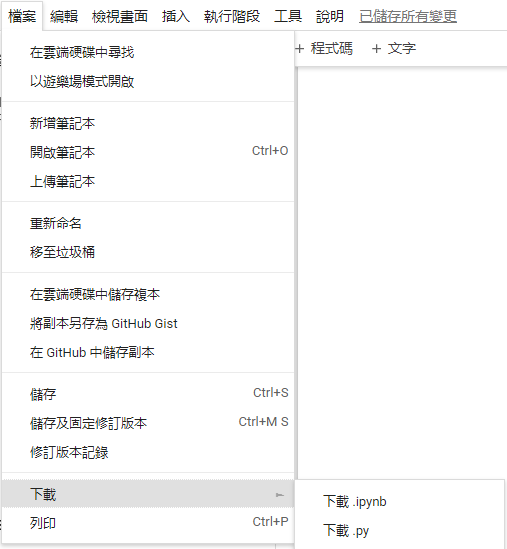


Rename the file to 'exam2.py' and submit it to ilms -> homework -> exam2.